In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_score # Método Silhouette
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

### Definindo o nosso dataset

In [ ]:
data_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
data_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data_set.describe(include = "all")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Normalizando e transformando os dados

In [ ]:
# Retira o label
data_set = data_set.drop(columns=[0])

# Normalizando o dataset
scaler = StandardScaler()
normalized_dataset = scaler.fit_transform(data_set)

# Reduzindo a dimensionalidade 
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(normalized_dataset)
transformed_dataset = pd.DataFrame(dataset_pca)

### Encontrando o valor ideal de Epsilon

Uma boa forma de se determinar o valor otimizado para epsilon consiste em calcular a distância para os n pontos mais próximos de cada um dos pontos, ordenar as distâncias e plotar os resultados. Uma vez que isso tenha sido feito, basta observar onde a curvatura é mais pronunciada.

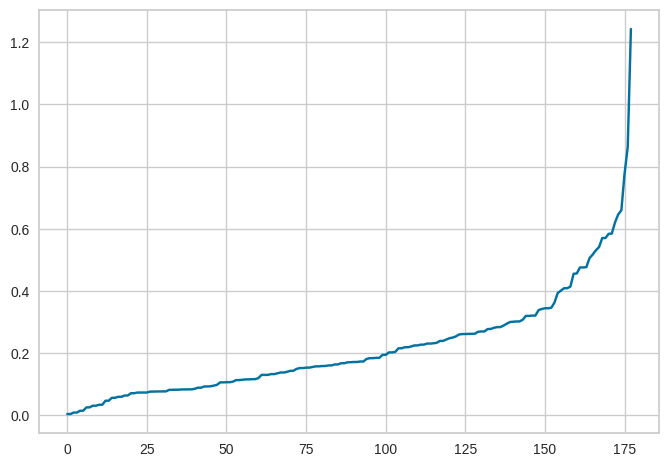

In [9]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(transformed_dataset)
distances, indices = nbrs.kneighbors(transformed_dataset)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


def generate_plot(_data, _labels):
  fig, ax = plt.subplots()

  ax.scatter(_data[0], _data[1], c=_labels, cmap='Set2')

  plt.show()

  return

Olhando o gráfico, percebemos que há alguns valores candidatos para nosso epsilon segundo os critérios estabelecidos acima. Notamos que a região de valores entre 0.37 (aproximadamente) e 0.5 é a que mais apresenta candidatos interessantes para o epsilon (pontos em que a curvatura é mais pronunciada).

### Resultados da clusterização do DBSCAN:

Portanto, a próxima coisa a se fazer é aplicar esses diferentes valores de epsilon (de 0.37 a 0.5) e ver como isso afeta o gráfico de clusters.

****************************************************************************************************


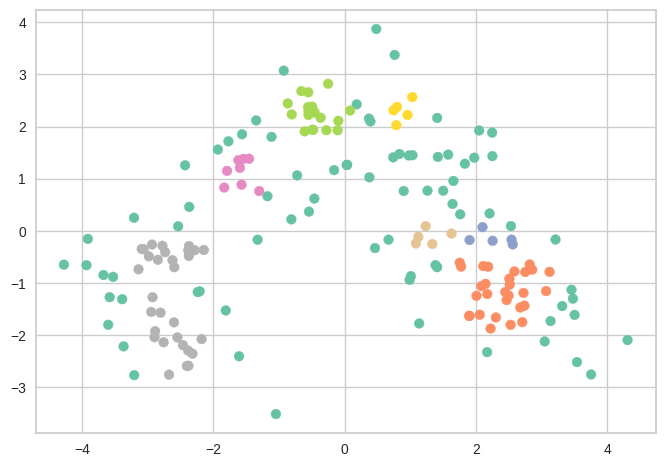

EPSILON = 0.37
****************************************************************************************************
****************************************************************************************************


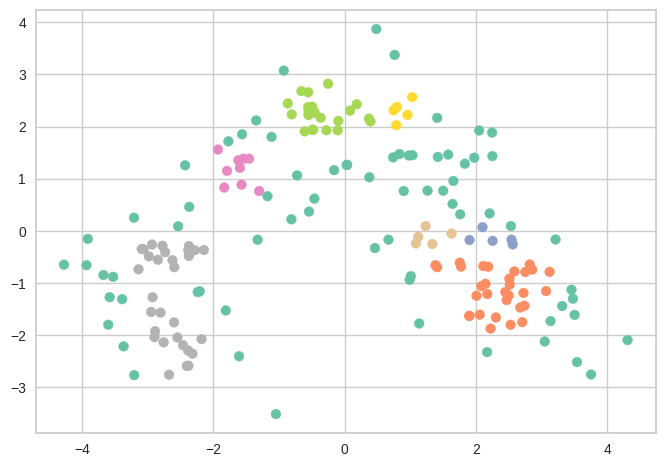

EPSILON = 0.375
****************************************************************************************************
****************************************************************************************************


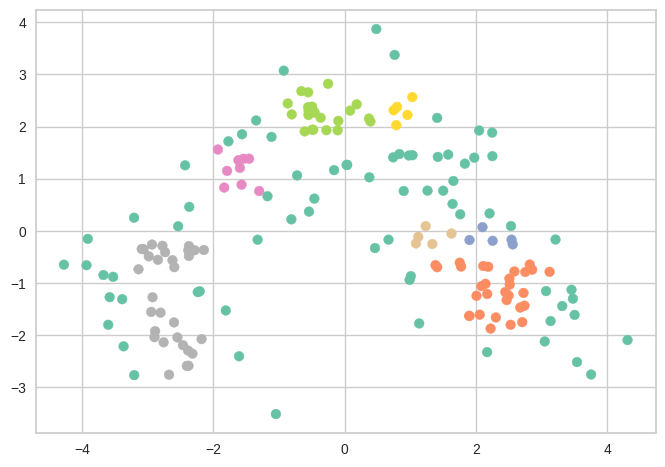

EPSILON = 0.38
****************************************************************************************************
****************************************************************************************************


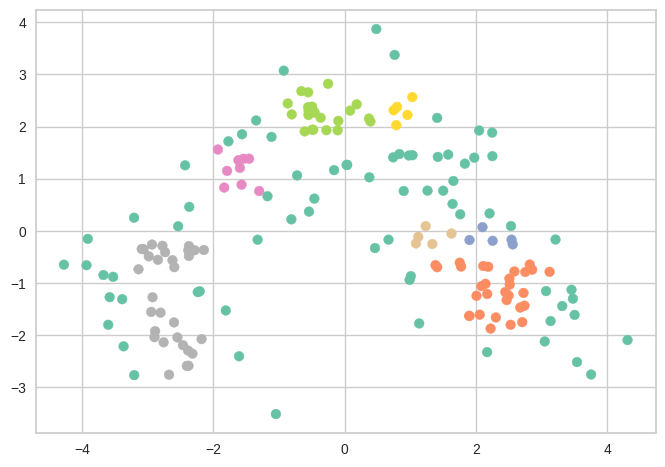

EPSILON = 0.385
****************************************************************************************************
****************************************************************************************************


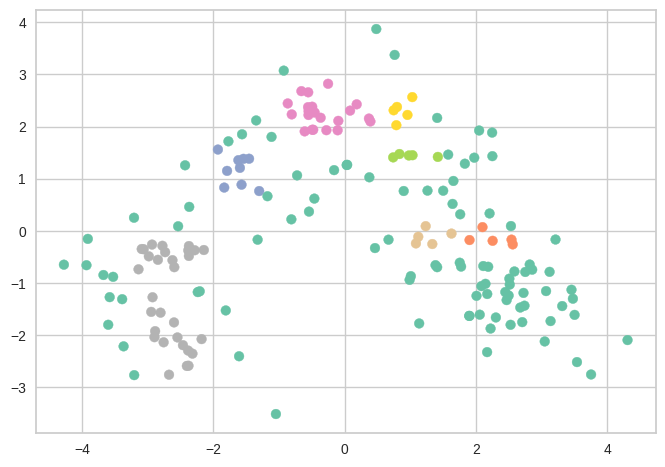

EPSILON = 0.39
****************************************************************************************************
****************************************************************************************************


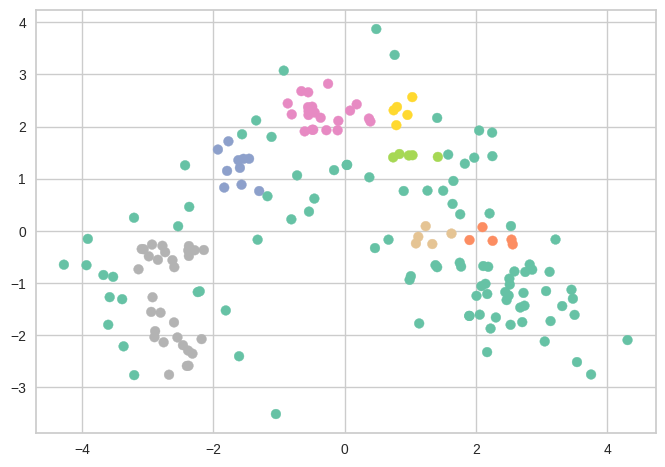

EPSILON = 0.395
****************************************************************************************************
****************************************************************************************************


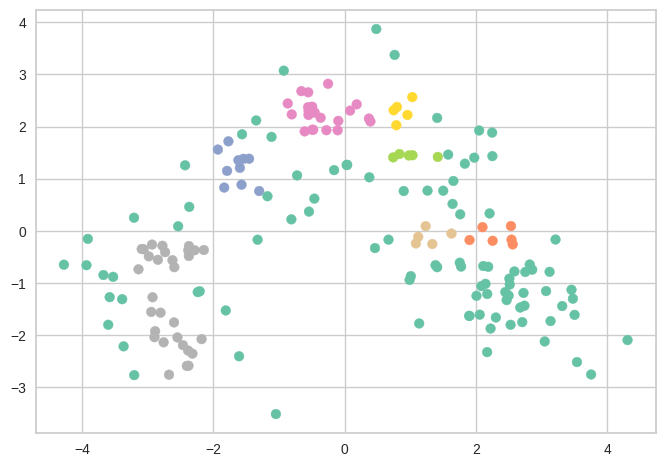

EPSILON = 0.4
****************************************************************************************************
****************************************************************************************************


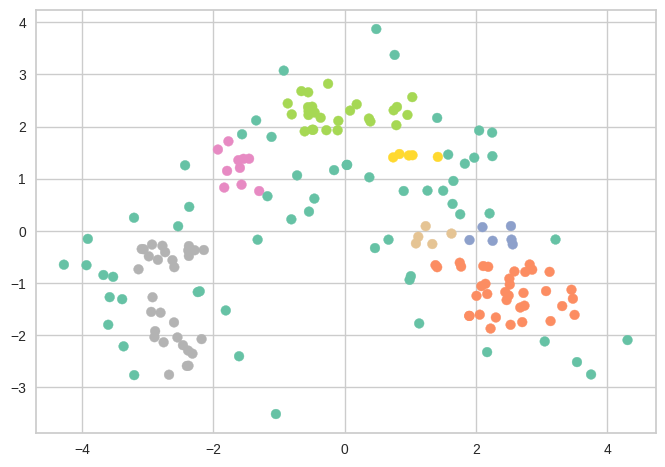

EPSILON = 0.405
****************************************************************************************************
****************************************************************************************************


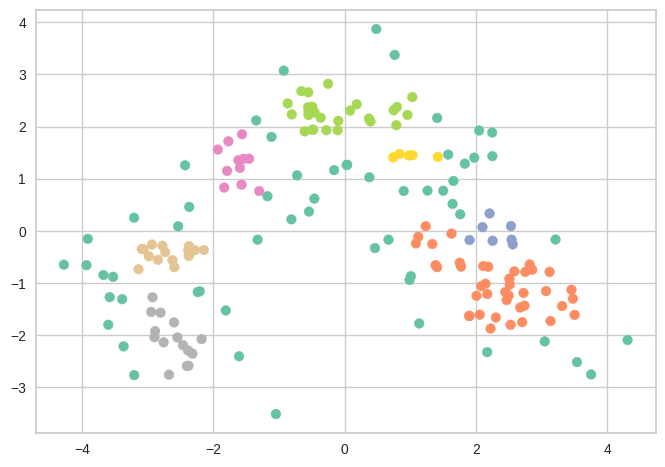

EPSILON = 0.41000000000000003
****************************************************************************************************
****************************************************************************************************


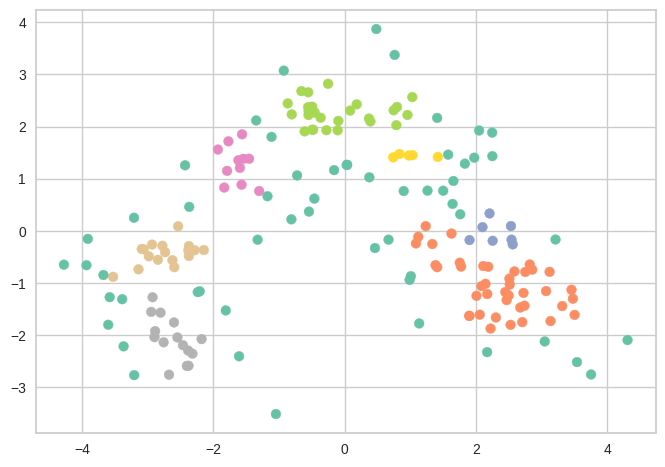

EPSILON = 0.41500000000000004
****************************************************************************************************
****************************************************************************************************


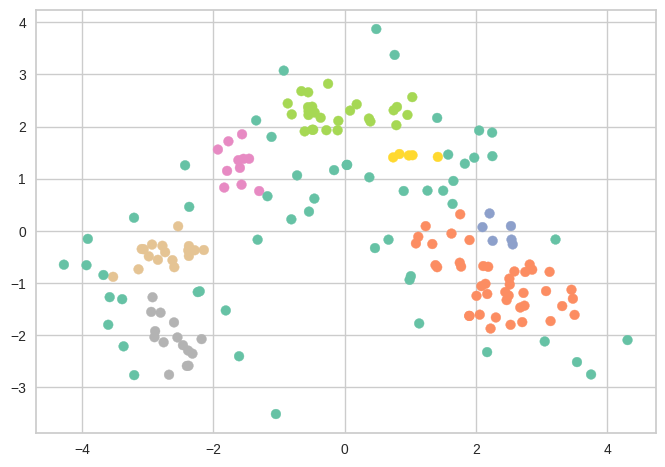

EPSILON = 0.42000000000000004
****************************************************************************************************
****************************************************************************************************


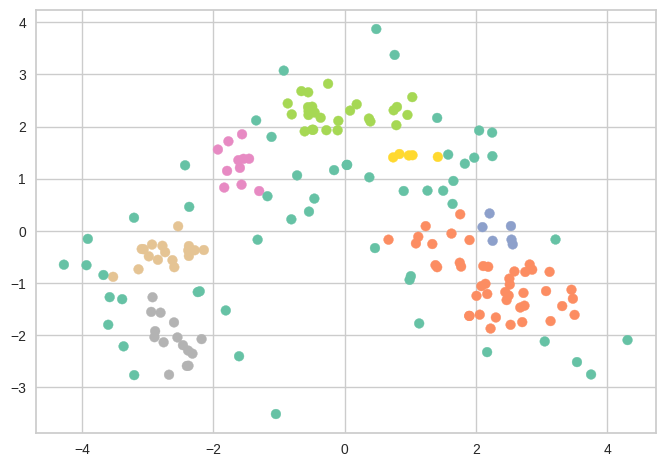

EPSILON = 0.42500000000000004
****************************************************************************************************
****************************************************************************************************


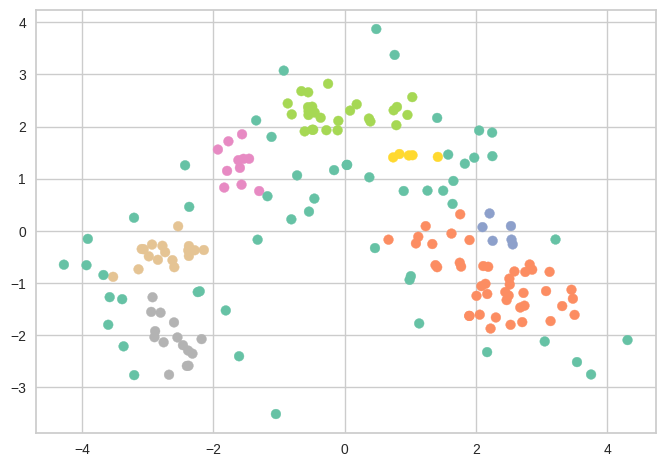

EPSILON = 0.43000000000000005
****************************************************************************************************
****************************************************************************************************


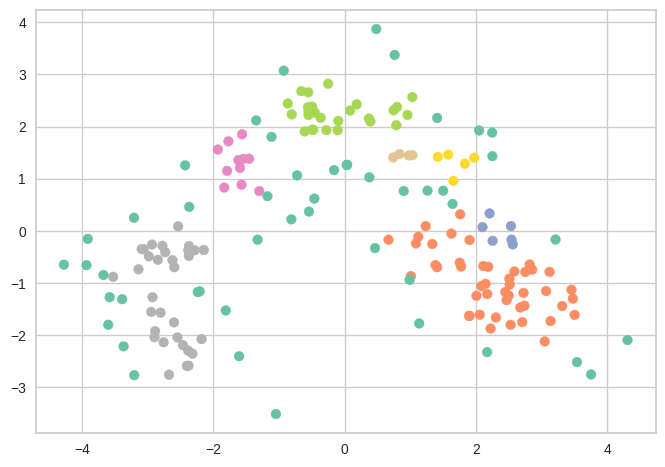

EPSILON = 0.43500000000000005
****************************************************************************************************
****************************************************************************************************


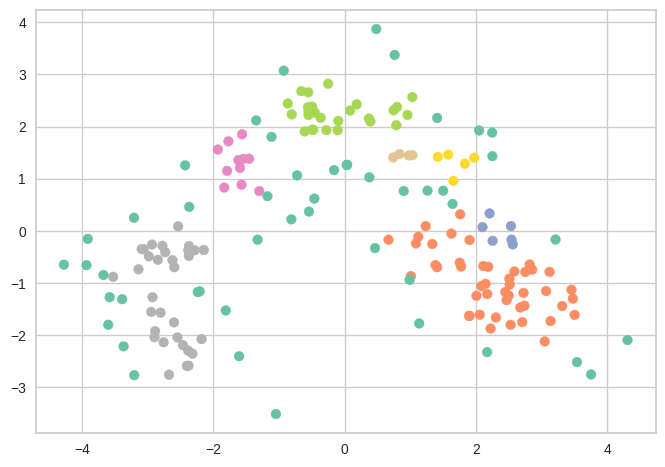

EPSILON = 0.44000000000000006
****************************************************************************************************
****************************************************************************************************


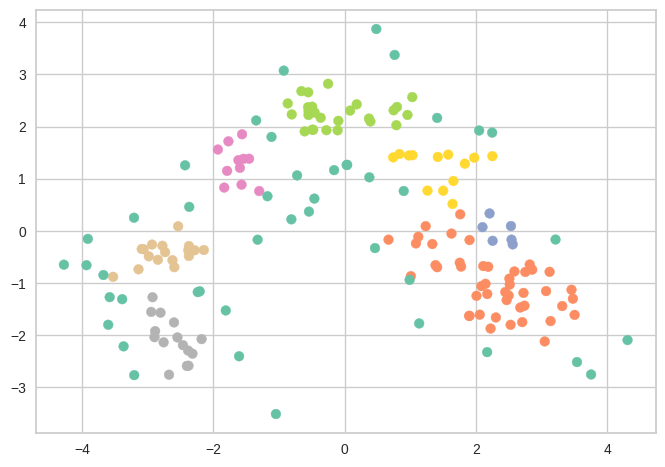

EPSILON = 0.44500000000000006
****************************************************************************************************
****************************************************************************************************


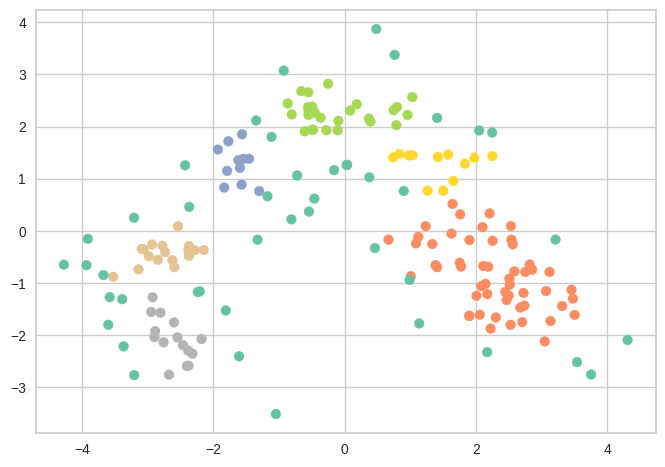

EPSILON = 0.45000000000000007
****************************************************************************************************
****************************************************************************************************


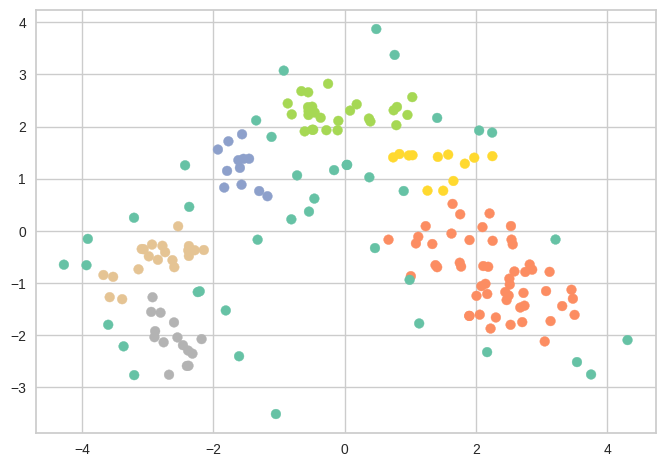

EPSILON = 0.45500000000000007
****************************************************************************************************
****************************************************************************************************


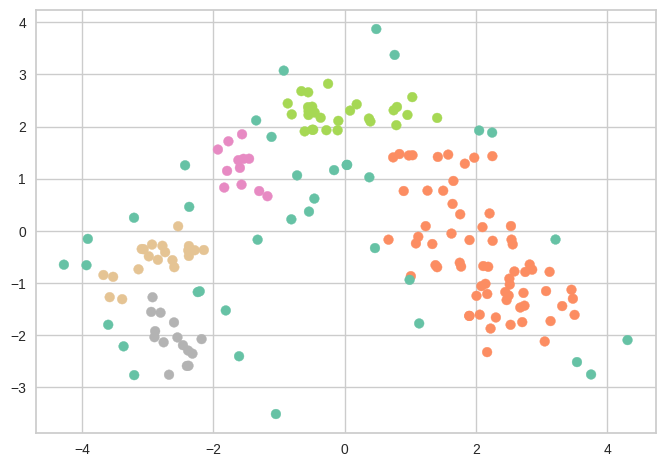

EPSILON = 0.4600000000000001
****************************************************************************************************
****************************************************************************************************


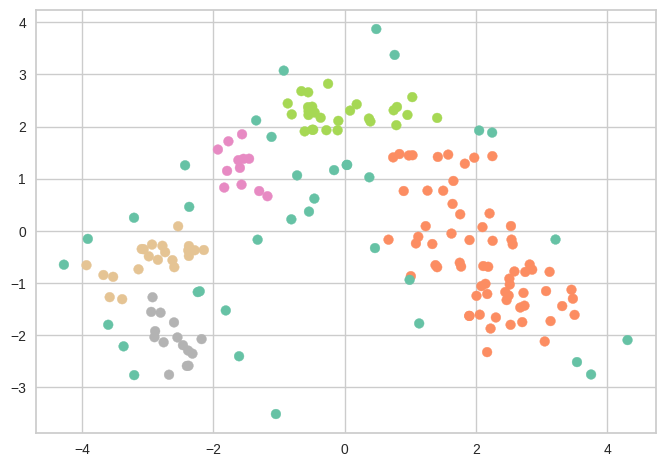

EPSILON = 0.4650000000000001
****************************************************************************************************
****************************************************************************************************


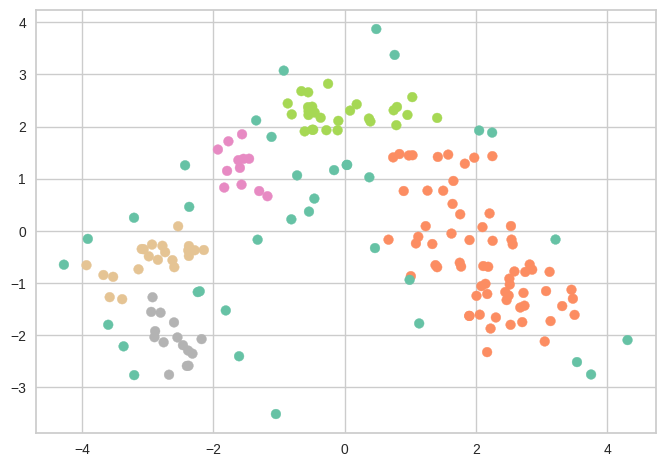

EPSILON = 0.4700000000000001
****************************************************************************************************
****************************************************************************************************


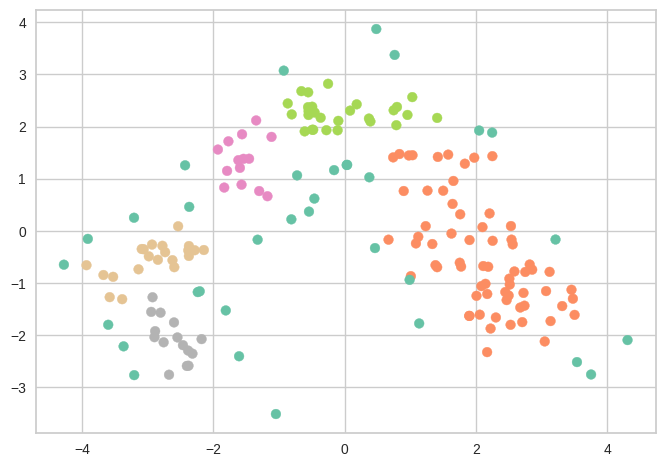

EPSILON = 0.4750000000000001
****************************************************************************************************
****************************************************************************************************


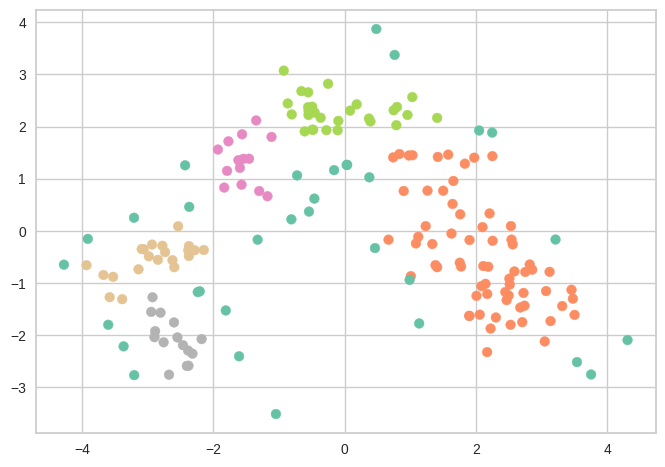

EPSILON = 0.4800000000000001
****************************************************************************************************
****************************************************************************************************


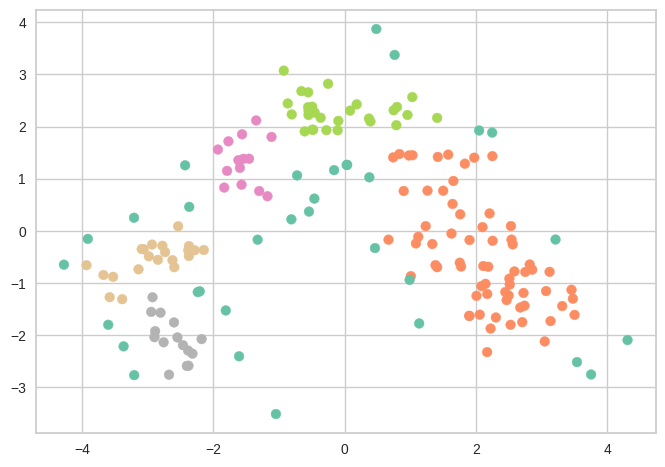

EPSILON = 0.4850000000000001
****************************************************************************************************
****************************************************************************************************


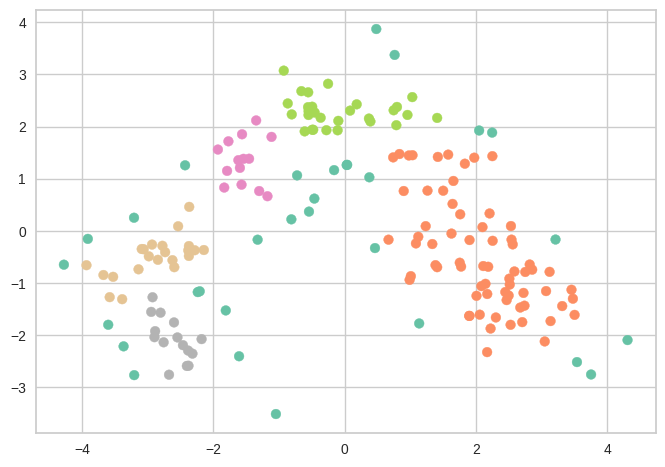

EPSILON = 0.4900000000000001
****************************************************************************************************
****************************************************************************************************


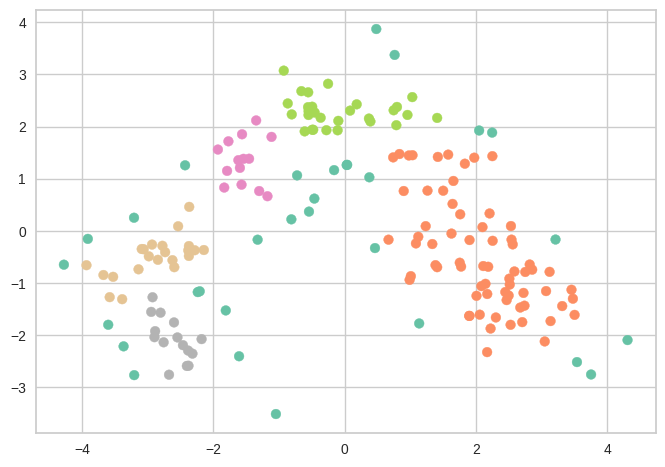

EPSILON = 0.4950000000000001
****************************************************************************************************
****************************************************************************************************


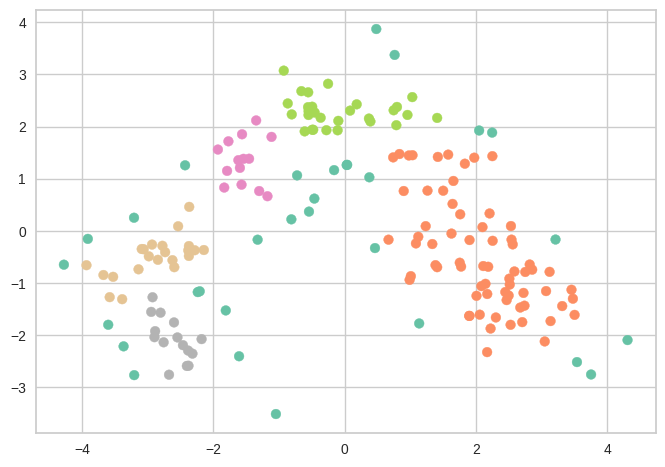

EPSILON = 0.5000000000000001
****************************************************************************************************


In [10]:
dist = 0.37
for clusters in range(1, 28):
  print('*'*100)
  clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
  cluster_labels = clustering.fit_predict(transformed_dataset)
  
  generate_plot(_data=transformed_dataset, _labels=cluster_labels) 
  print(f'EPSILON = {dist}')
  print('*'*100)
  dist += 0.005


Havendo feito isso, notamos que muitos dos gráficos são bem parecidos, com nenhuma ou pouquíssima mudança entre eles. Portanto, partindo do gráfico cujo epsilon é de valor 0.37, podemos destacar os seguintes gráficos (identificados pelo epsilon mínimo para que o gráfico tenha uma configuração como a apresentada ou muito parecida) como sendo os que tem uma diferença considerável entre si na sua configuração.

****************************************************************************************************


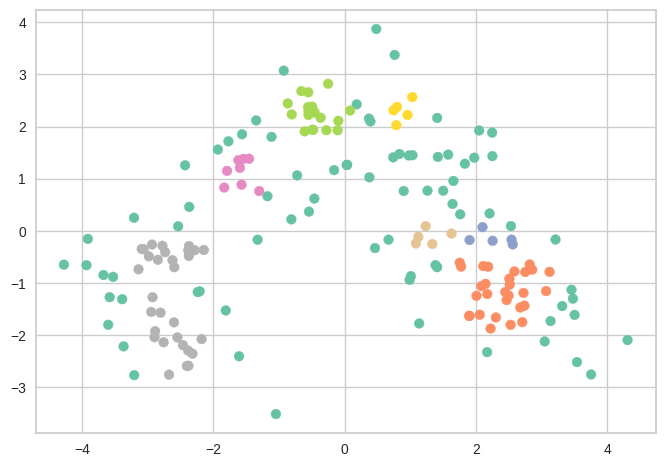

EPSILON = 0.37
****************************************************************************************************
****************************************************************************************************


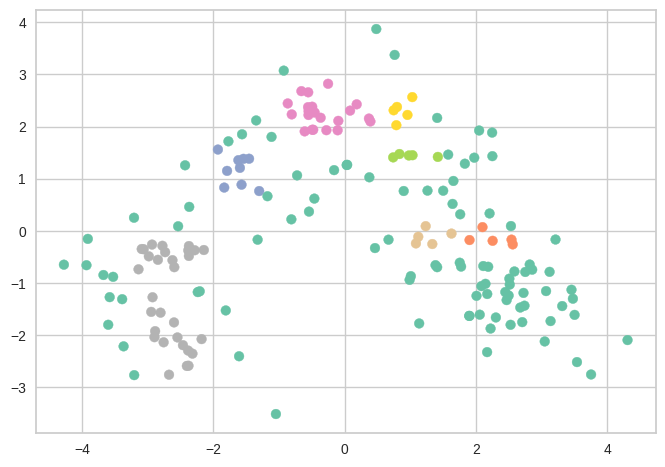

EPSILON = 0.39
****************************************************************************************************
****************************************************************************************************


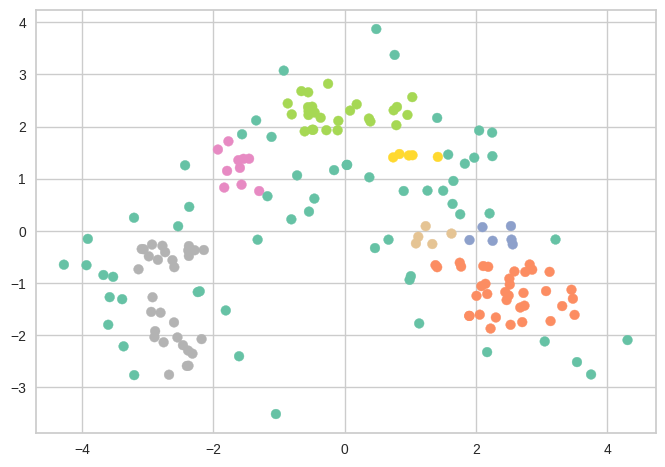

EPSILON = 0.405
****************************************************************************************************
****************************************************************************************************


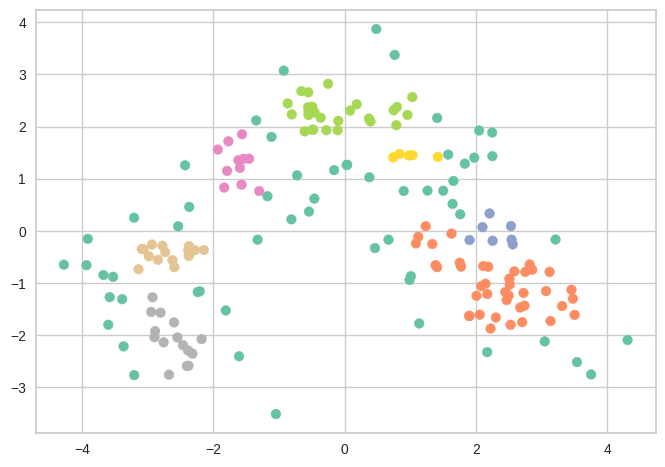

EPSILON = 0.41
****************************************************************************************************
****************************************************************************************************


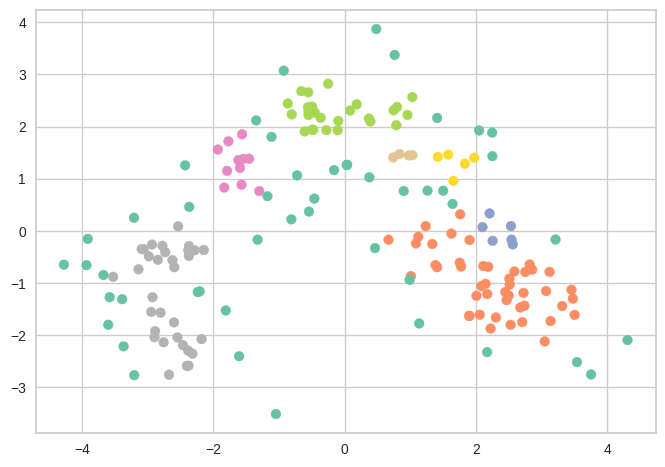

EPSILON = 0.435
****************************************************************************************************
****************************************************************************************************


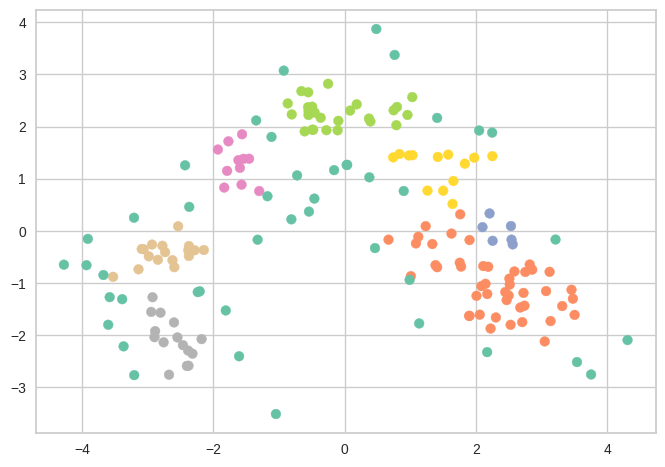

EPSILON = 0.445
****************************************************************************************************
****************************************************************************************************


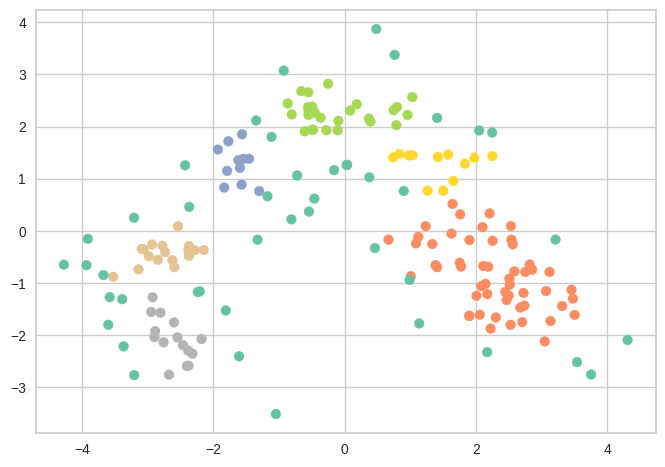

EPSILON = 0.45
****************************************************************************************************
****************************************************************************************************


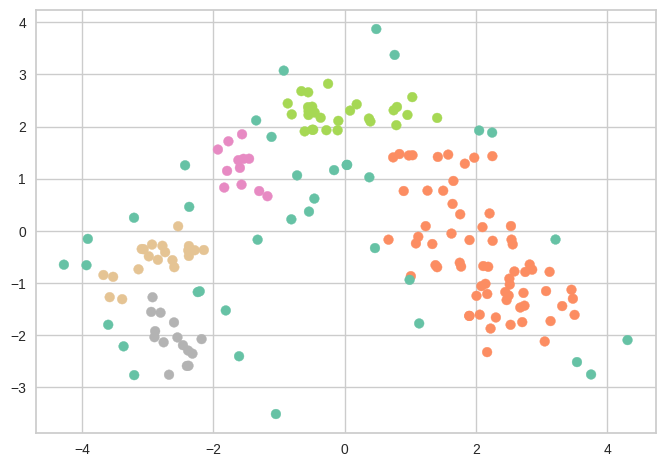

EPSILON = 0.46
****************************************************************************************************


In [15]:
dist = 0.37
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.39
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.405
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.41
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.435
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.445
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.45
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

dist = 0.46
print('*'*100)
clustering = DBSCAN(eps=dist, min_samples=5).fit(transformed_dataset)
cluster_labels = clustering.fit_predict(transformed_dataset)
generate_plot(_data=transformed_dataset, _labels=cluster_labels)   
print(f'EPSILON = {dist}')
print('*'*100)

Desses oito gráfico selecionados segundo os critérios escritos acima, podemos observar que seis deles apresentam 7 clusters, um apresenta 6 clusters e o último apresenta 5 clusters. Portanto, quanto à questão do número ótimo de clusters, parece razoável afirmar que se trata de um valor dentro dessa faixa de 5-7 clusters, sendo 7 o valor favorito pela sua predominância nos gráficos.